<a href="https://colab.research.google.com/github/roy2392/USA_House_Prices_Regression_Project/blob/main/project_usa_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

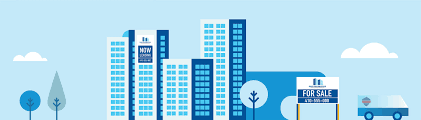

 # USA housing Price Prediction Project

A request has been made by an individual in the real estate business to assist with predicting housing prices for different regions in the United States. <br>
The objective is to develop a model that can receive inputs of house features and provide an estimated selling price. <br>
we will use the following viable algorithms to resolving this issue: 
* Linear Regression
* Decision Tree
* k-nearest neighbors
<br><hr><br>

Roey Zalta & Alon Sudri
<br>
April 2023

## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
# First, let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

# DATA SOURCE

<span style="color: lightblue">kaggle</span> - The world's largest data science community with powerful tools and resources to help you achieve your data science goals.. 

> The file is available for download here: https://www.kaggle.com/datasets/vedavyasv/usa-housing 

<br>
The data contains the following columns:
- 'Avg. Area Income': Avg. Income of residents of the city house is located in <br>
- 'Avg. Area House Age': Avg Age of Houses in same city <br>
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city <br>
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city <br>
- 'Area Population': Population of city house is located in <br>
- 'Price': Price that the house sold at <br>
- 'Address': Address for the house


In [2]:
#import the repository on github
!git clone <https://github.com/roy2392/USA_House_Prices_Regression_Project>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <https://github.com/roy2392/USA_House_Prices_Regression_Project>'


In [3]:
# read csv
url = 'https://raw.githubusercontent.com/roy2392/USA_House_Prices_Regression_Project/main/USA_Housing.csv'
data = pd.read_csv(url)
df = data.copy()

# Basic information

In [4]:
# Useful for quickly getting a sense of the data in a DataFrame, as it allows to view the column names and the data in the first few rows of the DataFrame.
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Provides a summary of a DataFrame's metadata including the number of non-null values, column data types, and memory usage.
# This method is useful for quickly understanding the structure of a DataFrame, as well as identifying missing or unexpected data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# EDA
Let's investigate the data and summarize the key insights


## Formating

Since the digits after the decimal point are insignificant in large volumes, the 'Price' column can be presented with just two decimal places.

In [6]:
# Convert the 'Price' column to a float data type and configure pandas to display floating-point numbers with two decimal places. 
# This can be useful for formatting output when working with financial or numerical data.
df.price = df.Price.astype('float')
pd.options.display.float_format = '{:.2f}'.format

<ipython-input-6-67ba48a36588>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.price = df.Price.astype('float')


In [7]:
# Gain a quick understanding of the dataset's distribution and to identify potential outliers, anomalies, or missing values.
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


## Validate the Data

As we can see the columns of the data tells us that each number represent the Avg per area. let's test that assumption

1. Extract the City per row

In [8]:
l1 = np.array([1,2,3])
l1.dtype

dtype('int64')

## Visualization of the data

Some simple plots to check out the relationships

Text(0.5, 0.98, 'Relationship Between Average Area Income and Price')

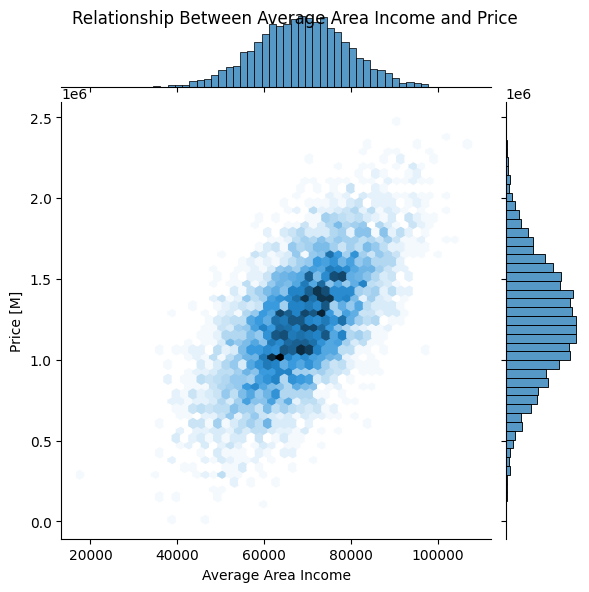

In [9]:
# create the jointplot
jp = sns.jointplot(data=df, x='Avg. Area Income', y='Price', kind='hex')

# set the x-label and y-label
jp.set_axis_labels(xlabel='Average Area Income', ylabel='Price [M]')

# set the title
jp.fig.suptitle('Relationship Between Average Area Income and Price')

> The peak around 1.2 million in the plot suggests that this is the most common average price per income in the dataset, while the higher average price per income for incomes between 50,000 to 70,000 suggests that this income range may be associated with a higher demand for housing or higher quality properties.

Text(0.5, 0.98, 'Relationship Between Average Area Population and Price')

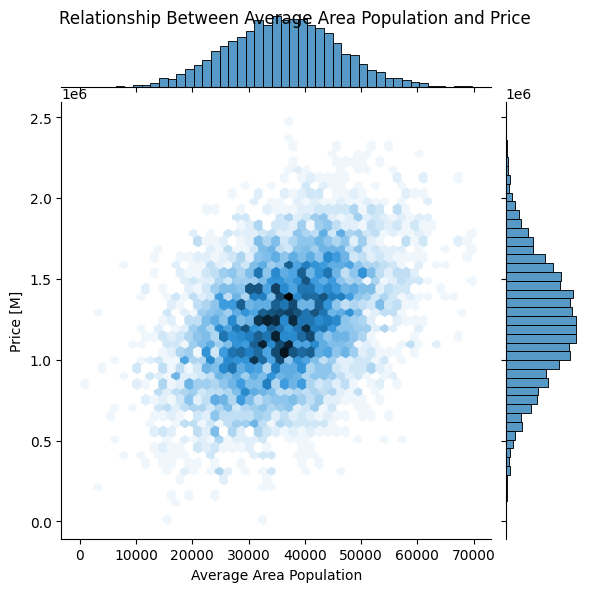

In [10]:
# create the jointplot
jp = sns.jointplot(data=df, x='Area Population', y='Price', kind='hex')

# set the x-label and y-label
jp.set_axis_labels(xlabel='Average Area Population', ylabel='Price [M]')

# set the title
jp.fig.suptitle('Relationship Between Average Area Population and Price')

> The peak observed in the plot around 1.2 million suggests that this is the most common price range for houses with an average area population falling within a range between 35,000 to 45,000

Text(0.5, 0.98, 'Relationship Between Average Area House Age and Price')

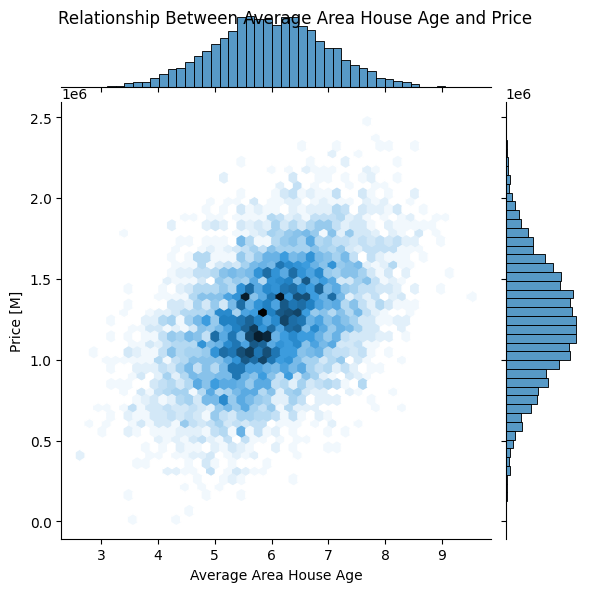

In [11]:
# create the jointplot
jp = sns.jointplot(data=df, x='Avg. Area House Age', y='Price', kind='hex')

# set the x-label and y-label
jp.set_axis_labels(xlabel='Average Area House Age', ylabel='Price [M]')

# set the title
jp.fig.suptitle('Relationship Between Average Area House Age and Price')

> The peak observed in the plot around 1.2 million suggests that this is the most common price range for houses with an average area house age falling within a range between 5 to 7

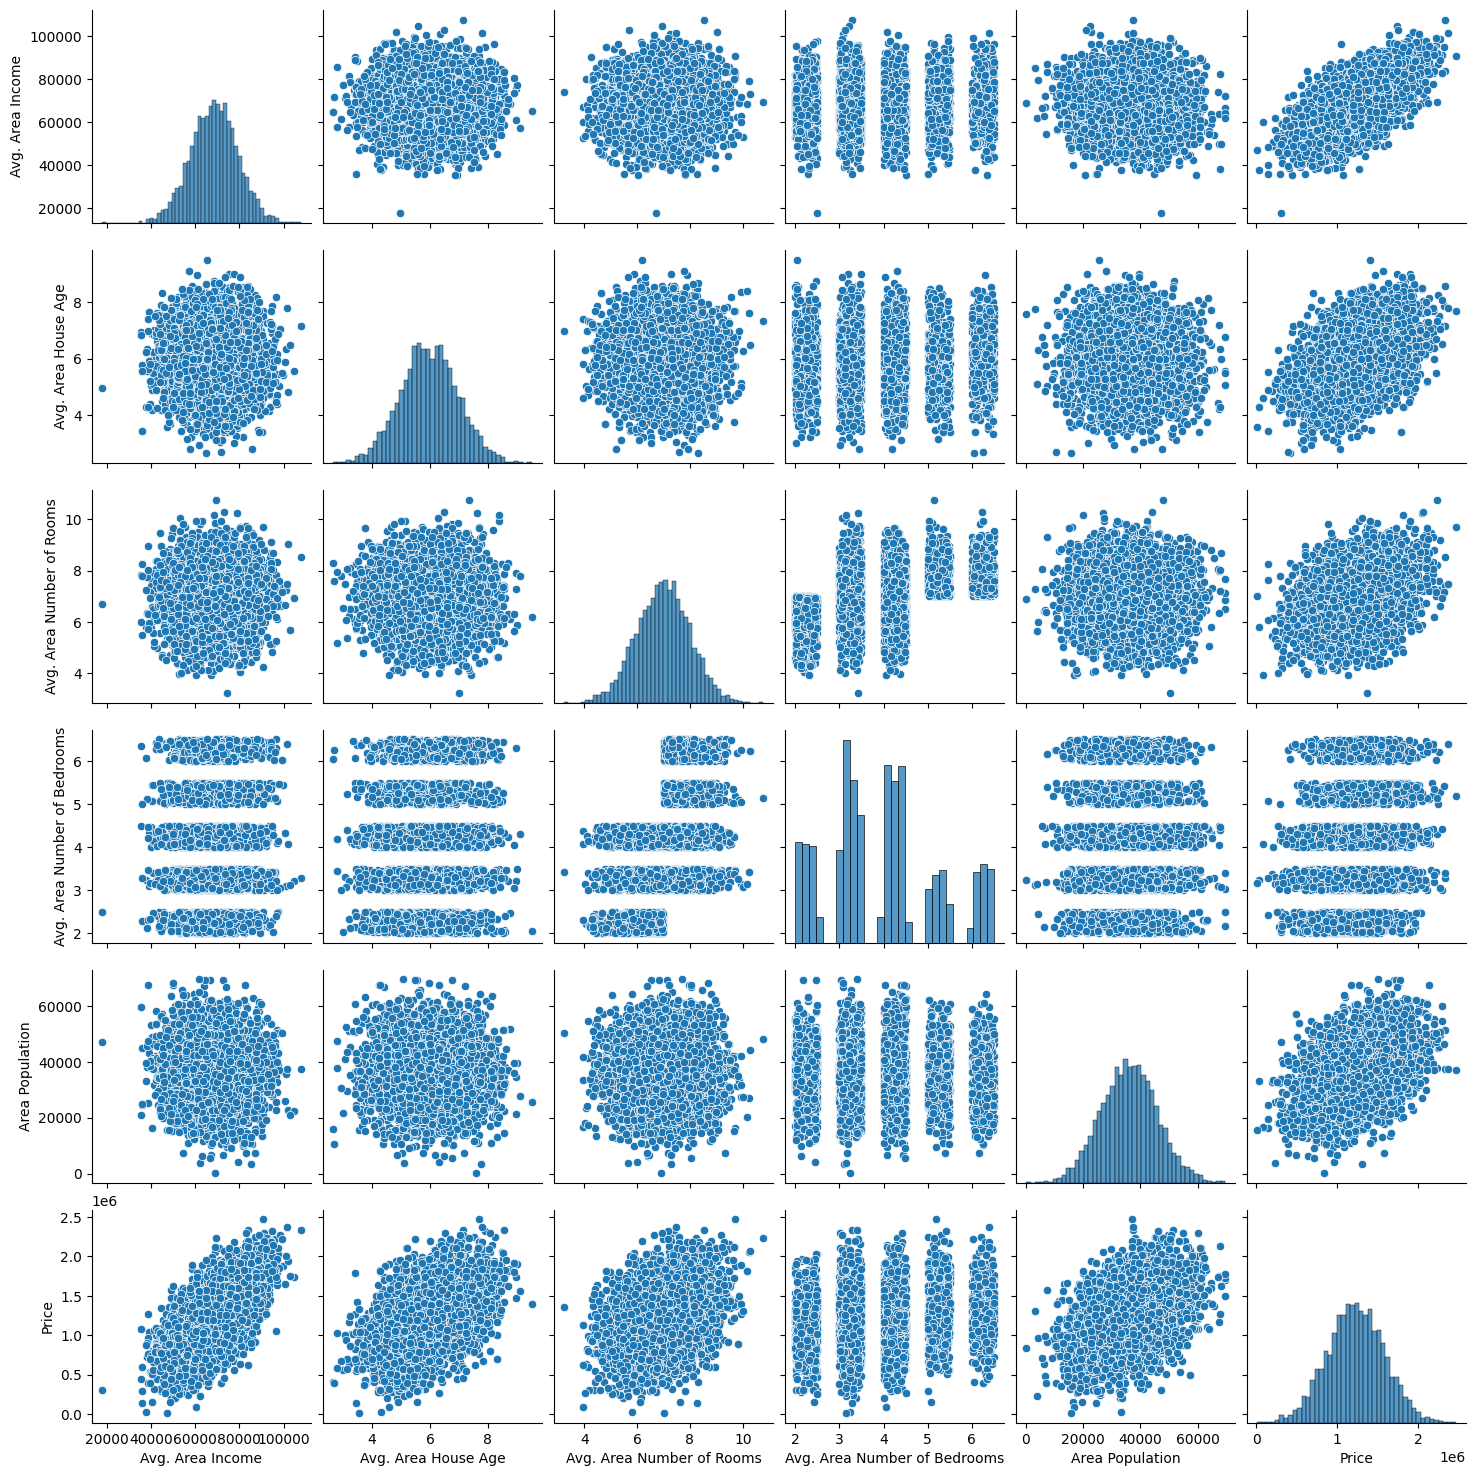

In [12]:
# Explore the relationship between multiple variables in a dataset and identifying potential patterns, correlations or trends. 
# It can also help identify potential outliers, anomalies, or missing values.
sns.pairplot(df)

> The result shows that the most interesting is the income and population, and house age per price. 
>However, it is important to note that the statement only provides a brief overview of the pairplot results, and further analysis is required to fully understand the relationships between the variables and their significance in the given dataset.

Let's check the distribution for our predicted target column

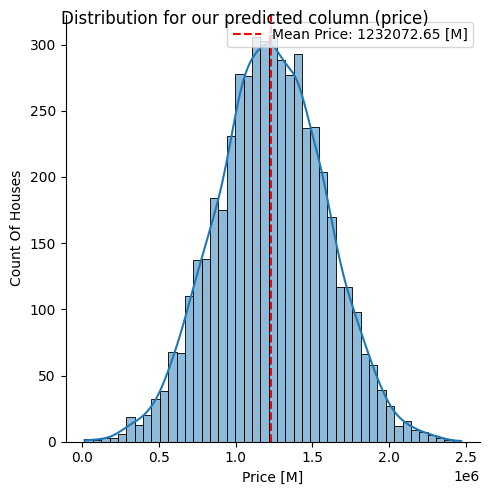

In [13]:
# create the plot
dp = sns.displot(df['Price'], kde=True)

# set the x-label and y-label
dp.set(xlabel='Price [M]', ylabel='Count Of Houses')

# set the title
dp.fig.suptitle('Distribution for our predicted column (price)')


# add a vertical line at the location of the mean price
mean_price = df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean Price: {mean_price:.2f} [M]')
plt.legend()


Next, let's add a Z score column which caculates the standard deviation of each house from the mean price

In [14]:
#print the std
std = df['Price'].std()
print(f"the standard deviation of the prices is: {std}")
#create a z score column
df['Z_score'] = stats.zscore(df['Price'])
#find out how many precentage of the data is in 1/2/3 & -1/-2/-3 std from the mean
mean_price = df['Price'].mean()
lower_limit_1 = mean_price -1 * std
upper_limit_1 = mean_price +1 * std
lower_limit_2 = mean_price -2 * std
upper_limit_2 = mean_price +2 * std
lower_limit_3 = mean_price -3 * std
upper_limit_3 = mean_price +3 * std
std_precentage_one = ((df['Price'] >= lower_limit_1 ) & (df['Price'] <= upper_limit_1 )).mean()*100
std_precentage_two = ((df['Price'] >= lower_limit_2 ) & (df['Price'] <= upper_limit_2 )).mean()*100
std_precentage_three = ((df['Price'] >= lower_limit_3 ) & (df['Price'] <= upper_limit_3 )).mean()*100

print(f"overall {std_precentage_one}% falls between  one standard deviation from the mean")
print(f"overall {std_precentage_two}% falls between  one standard deviation from the mean")
print(f"overall {std_precentage_three}% falls between  one standard deviation from the mean")




the standard deviation of the prices is: 353117.62658106093
overall 68.14% falls between  one standard deviation from the mean
overall 95.66% falls between  one standard deviation from the mean
overall 99.74% falls between  one standard deviation from the mean


It seems that the price distribution is following the emphrical rule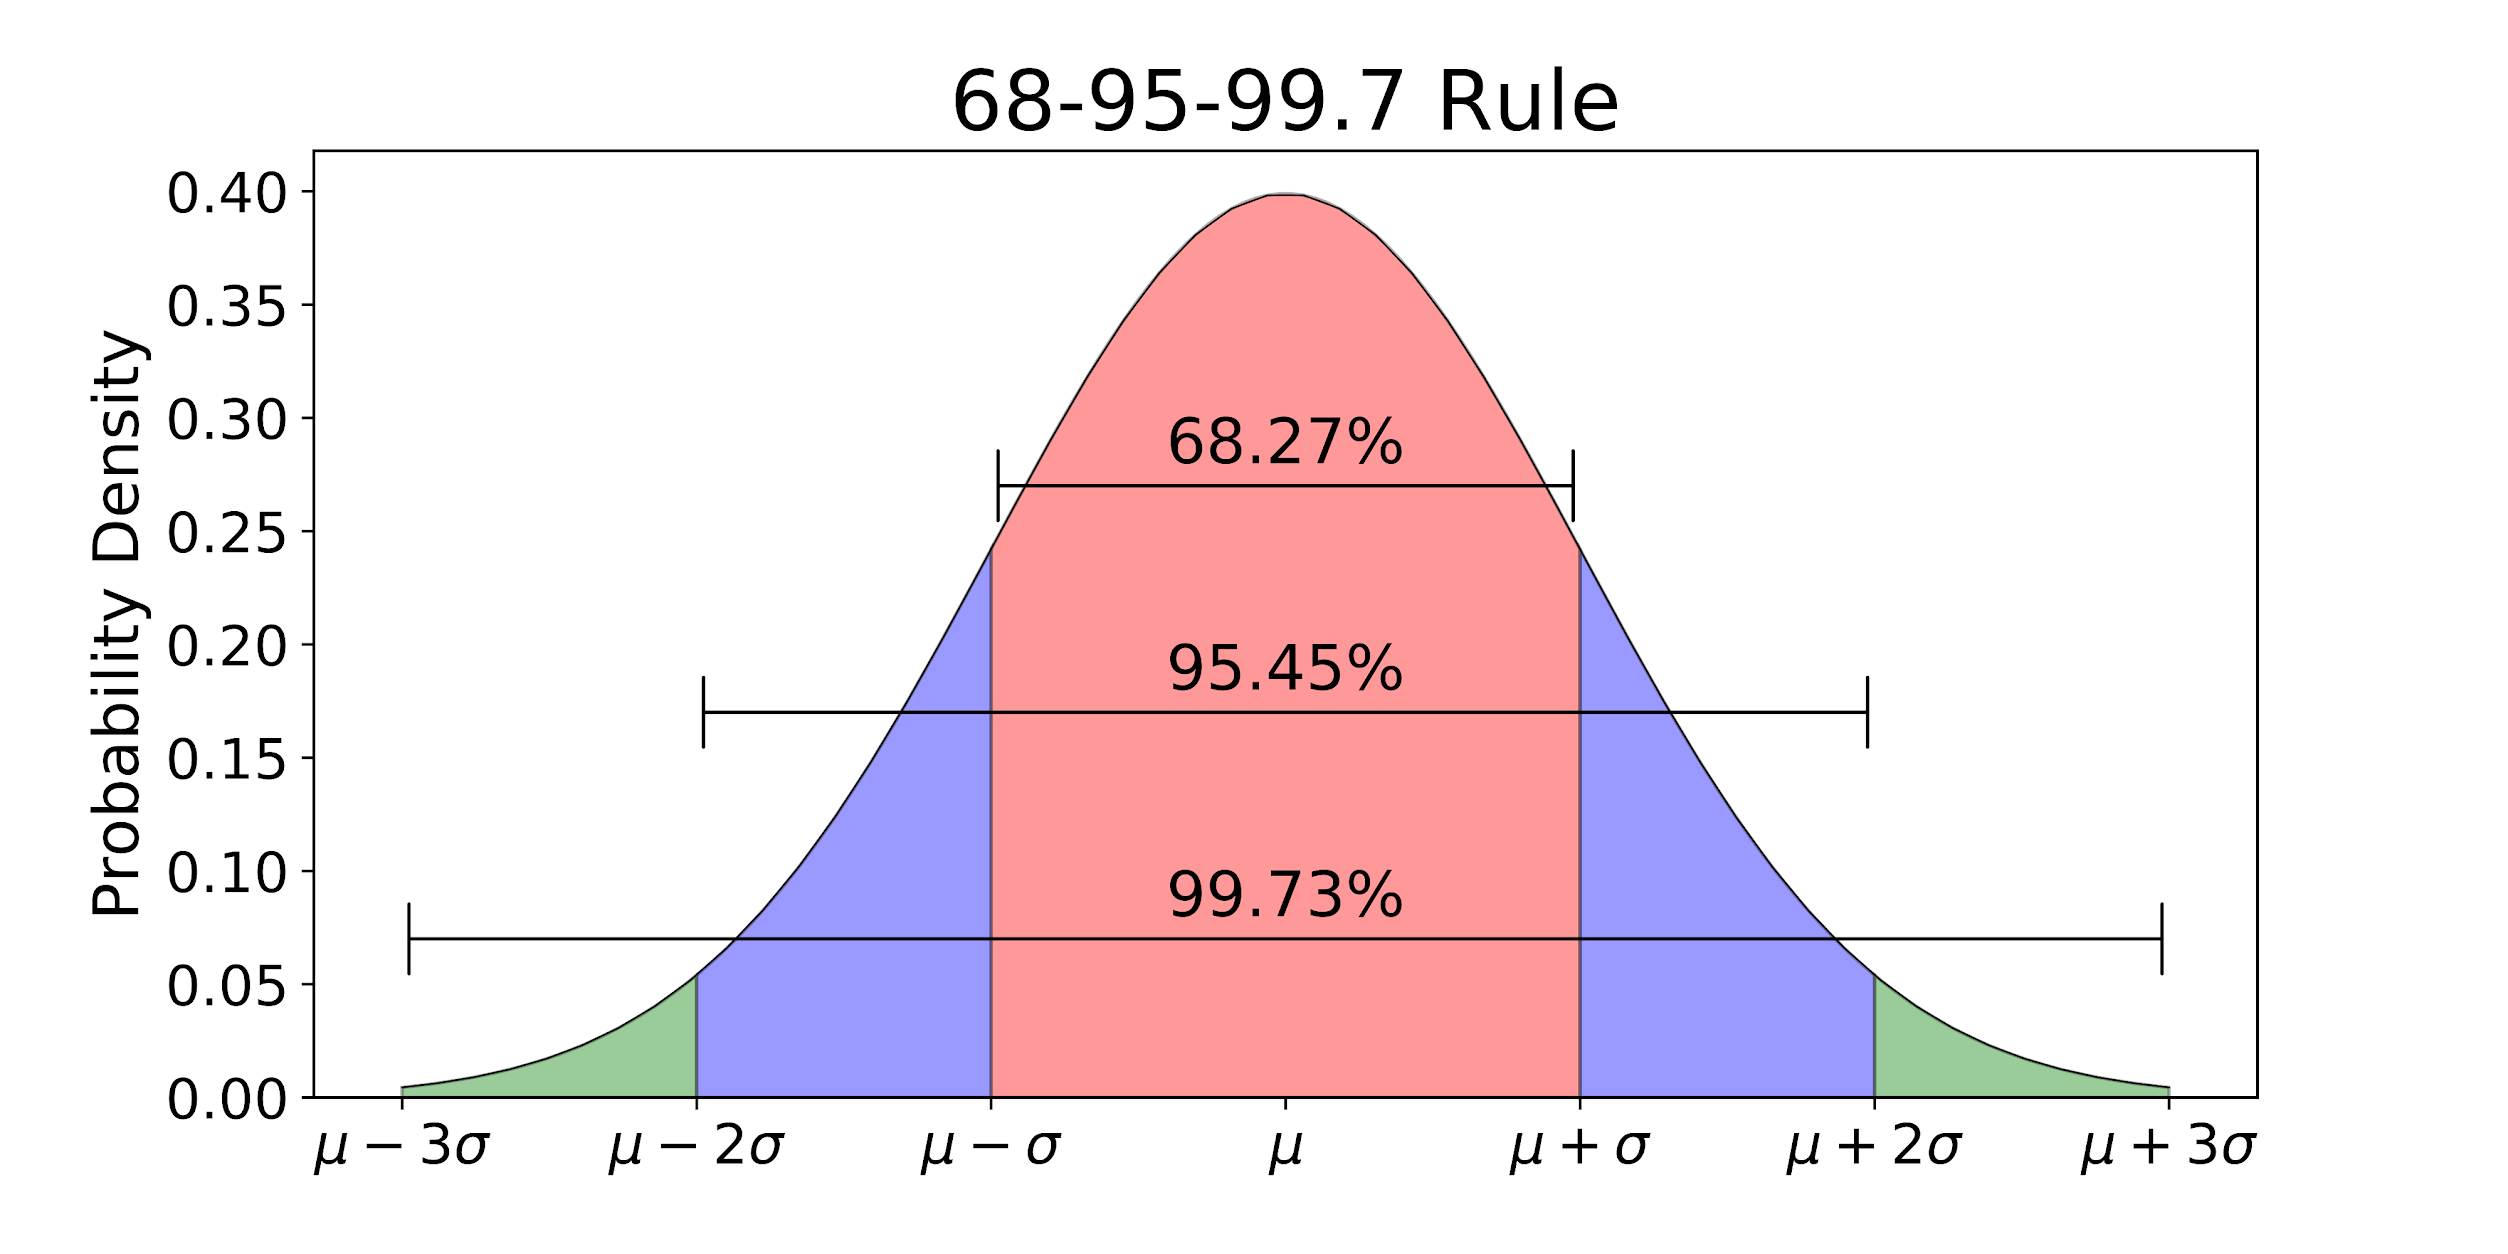

Let's visualize the correlation between the variables using a heatmap.

<Axes: >

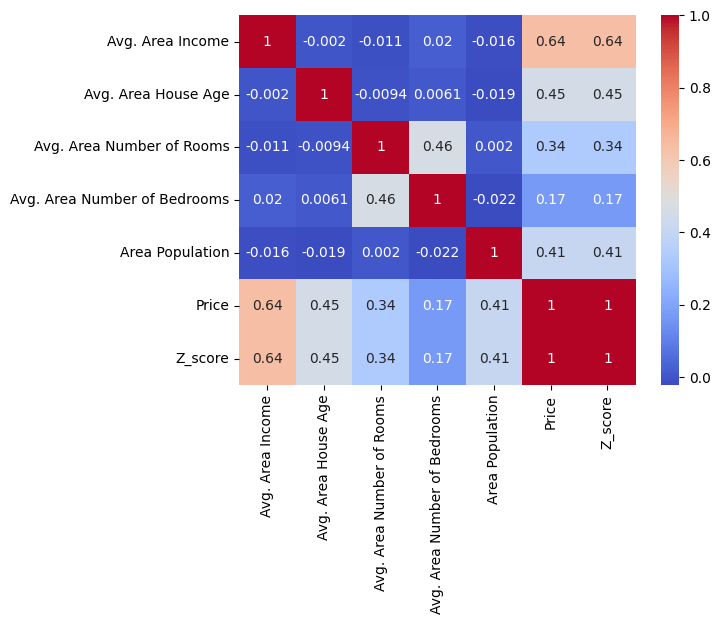

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

> It seems that Avg. Area Income has the highest relation <br>
> According to Pearson,  Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated

# Data Validation

as the names suggests, the columns represent the Avg. per state for each address. </b>
let's test that out, we will extract the city's name per state and we will sample each state and will caculate the values to see if we have a match

In [16]:
# convert the address column to string
df['Address'] = df['Address'].astype('string')
# extract state names
# Define a regex pattern to match the state name
pattern = r',\s*([A-Za-z\s]+)'
# Extract the city name from the address column
df['State'] = df['Address'].str.extract(pattern)
#show the table
df['State'].unique()

array(['NE ', 'CA ', 'WI ', <NA>, 'KS ', 'CO ', 'TN ', 'NM ', 'PW ',
       'AR ', 'Box ', 'HI ', 'ME ', 'IN ', 'MI ', 'DE ', 'AZ ', 'MA ',
       'MN ', 'AL ', 'NY ', 'NV ', 'VA ', 'ID ', 'OK ', 'NH ', 'MO ',
       'WV ', 'WY ', 'MH ', 'UT ', 'SD ', 'CT ', 'AK ', 'WA ', 'RI ',
       'NJ ', 'KY ', 'NC ', 'IA ', 'VT ', 'FM ', 'ND ', 'LA ', 'MP ',
       'OR ', 'TX ', 'DC ', 'PR ', 'MT ', 'AS ', 'OH ', 'MS ', 'IL ',
       'VI ', 'GA ', 'PA ', 'MD ', 'SC ', 'GU ', 'FL '], dtype=object)

In [53]:

# Create an empty dataframe with the required columns
results_df = pd.DataFrame(columns=['State', 'Avg. Area Income', 'Std. Error', 'Lower Bound', 'Upper Bound'])

for state, group in grouped:
    # Get a sample of 50 houses for the current state
    sample = group.sample(n=50, replace=True, random_state=42)

    # Calculate the mean and standard error for the sample
    mean = sample.mean()
    std_error = sample.std() / np.sqrt(50)

    # Calculate the lower and upper bounds of the 95% confidence interval
    lower_bound = mean - 1.96 * std_error
    upper_bound = mean + 1.96 * std_error

    # Add the results to the dataframe
    results_df = results_df.append({
        'State': state,
        'Avg. Area Income': mean['Avg. Area Income'],
        'Std. Error': std_error['Avg. Area Income'],
        'Lower Bound': lower_bound['Avg. Area Income'],
        'Upper Bound': upper_bound['Avg. Area Income']
    }, ignore_index=True)

# Print the dataframe
results_df.head(50)


<ipython-input-53-234223f977f3>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = sample.mean()
<ipython-input-53-234223f977f3>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_error = sample.std() / np.sqrt(50)
<ipython-input-53-234223f977f3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-53-234223f977f3>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling

,State,Avg. Area Income,Std. Error,Lower Bound,Upper Bound
0,AK,67403.58,1474.28,64513.99,70293.17
1,AL,64929.24,1475.08,62038.08,67820.40
2,AR,68109.88,1841.79,64499.97,71719.79
3,AS,68919.37,1469.77,66038.62,71800.12
4,AZ,71333.59,1494.22,68404.92,74262.27
5,Box,67228.80,1709.22,63878.73,70578.86
6,CA,68554.91,1313.18,65981.08,71128.73
7,CO,71161.46,1558.88,68106.06,74216.86
8,CT,71307.08,1611.85,68147.85,74466.30
9,DC,69882.68,1527.14,66889.49,72875.88


## Outliers

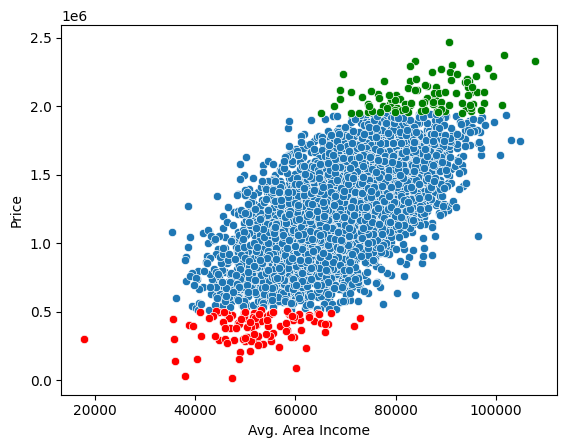

In [18]:
# Calculate the top and bottom 2 percentage of y (Price)
df_bottom_range = np.percentile(df['Price'], 2)
df_top_range = np.percentile(df['Price'], 98)

# Plot scatter plot with all data points
sns.scatterplot(data=df, x='Avg. Area Income', y='Price')

# Plot separate scatter plot for top 2% of data points
sns.scatterplot(data=df[df['Price'] <= df_bottom_range], x='Avg. Area Income', y='Price', color='red')
sns.scatterplot(data=df[df['Price'] >= df_top_range], x='Avg. Area Income', y='Price', color='green')

# Show the plot
plt.show()

> The Avg Area Income correlated, but we do have outliers which will be hard to predict. 

##  Feature Enginiering

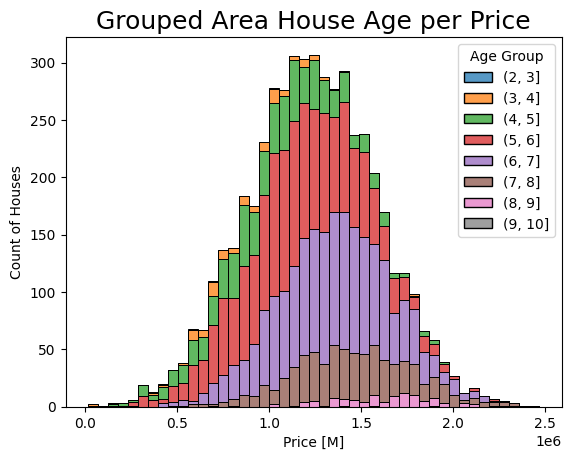

In [19]:
# Define your binning range for 'Avg. Area House Age'
bins = [2,3,4,5,6,7,8,9,10]
df_feature = df.copy()

# Use pandas cut() function to create a new column with binned groups
df_feature['Age Group'] = pd.cut(df_feature['Avg. Area House Age'], bins)

# Create a histogram with stacked bars for each Age Group
sns.histplot( x='Price', data=df_feature, hue='Age Group', multiple="stack")

# Set the style of the plot
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

# Add x-label, y-label, and title to the plot
plt.xlabel('Price [M]')
plt.ylabel('Count of Houses')
plt.title('Grouped Area House Age per Price')
plt.show()

> It seems that, the  older the house area , the higher the price is - we need to consider it while buidling our model. <br>
> We will use different model for each group and then will combine it

In [20]:
# Add the age group as a new feature 
df['Avg. Area House Age Group'] = df_feature['Avg. Area House Age'].apply(round)

# checkout the mean Price by Avg. Area House Age 
df.groupby(pd.cut(df['Avg. Area House Age'], bins))['Price'].mean()

Avg. Area House Age
(2, 3]     622323.61
(3, 4]     879891.08
(4, 5]    1016217.85
(5, 6]    1144488.45
(6, 7]    1330330.67
(7, 8]    1440584.45
(8, 9]    1611558.46
(9, 10]   1619796.32
Name: Price, dtype: float64

# Train Test Split

We will divide the data into two sets: a training set and a testing set.<br>
The training set will be used to train the model, while the testing set will be used to evaluate the performance of the model.

In [21]:
#%pip install scikit-learn
from sklearn.model_selection import train_test_split

In [22]:
# 30% of the data is allocated to the test set, and the remaining 70% is allocated to the training set
train, test = train_test_split(df, test_size=0.3, random_state=101)

## Transformer - Delete Outliers

> The following transformer is designed to remove outliers from the data, specifically those that fall in the top and bottom 3 percentiles of the distribution.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveOutliersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, low_pct=2, high_pct=98):
        self.low_pct = low_pct
        self.high_pct = high_pct
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, train):
        # Calculate the lower and upper bounds based on y
        self.lower_bound = np.percentile(train['Price'], self.low_pct)
        self.upper_bound = np.percentile(train['Price'], self.high_pct)
        return self

    def transform(self,train):
        # Remove rows where y is outside of the lower and upper range
        mask = (train['Price'] >= self.lower_bound) & (train['Price'] <= self.upper_bound)
        train_filtered = train.loc[mask]

        return train_filtered


## Use the transformer to fit the model

In [24]:
# Assuming the target column is 'Price'
X_train = train.drop('Price', axis=1)
y_train = train['Price']

# Create and fit the transformer
remove_outliers_transformer = RemoveOutliersTransformer()
train_filtered = remove_outliers_transformer.fit_transform(train)

# print the results
print(f'the shape of the data before the transformer: {train.shape}')
print(f'the shape of the data after the transformer: {train_filtered.shape}')

the shape of the data before the transformer: (3500, 10)
the shape of the data after the transformer: (3360, 10)


> The dataset decreased by roughly 6% after utilizing the transformer to eliminate outliers.

In [25]:
#train data
X_train = train.drop(columns=['Price', 'Address','State'],axis = 1) # features
y_train = train['Price'] # the target variable (the column which need to be predicted)

#test data 
X_test = test.drop(columns=['Price', 'Address','State'],axis = 1) # features
y_test = test['Price'] # the target variable (the column which need to be predicted)

>  Note: As the Address column holds only textual data that cannot be used by the model, we will remove it from our dataset.

##  Model 1 - Linear Regression

Let's start training our model with a linear regression algorithm. <br>
To begin, we need to split our data into an X array that contains the features to train on, and a y array with the target variable, which in this case is the Price column.

In [26]:
from sklearn.linear_model import LinearRegression

## Estimator - separate model for each age group

In [27]:
class HouseAgeEstimator:
  def __init__(self):
    self.reg_model_3 = LinearRegression()
    self.reg_model_4 = LinearRegression()
    self.reg_model_5 = LinearRegression()
    self.reg_model_6 = LinearRegression()
    self.reg_model_7 = LinearRegression()
    self.reg_model_8 = LinearRegression()
    self.reg_model_9 = LinearRegression()

  def _slice_df(self, X, y=None):
    X_3 = X.loc[X['Avg. Area House Age Group']==3]
    X_4 = X.loc[X['Avg. Area House Age Group']==4]
    X_5 = X.loc[X['Avg. Area House Age Group']==5]
    X_6 = X.loc[X['Avg. Area House Age Group']==6]
    X_7 = X.loc[X['Avg. Area House Age Group']==7]
    X_8 = X.loc[X['Avg. Area House Age Group']==8]
    X_9 = X.loc[X['Avg. Area House Age Group']==9]
    
    if y is not None:
      y_3= y.loc[X['Avg. Area House Age Group']==3]
      y_4= y.loc[X['Avg. Area House Age Group']==4]
      y_5= y.loc[X['Avg. Area House Age Group']==5]
      y_6= y.loc[X['Avg. Area House Age Group']==6]
      y_7= y.loc[X['Avg. Area House Age Group']==7]
      y_8= y.loc[X['Avg. Area House Age Group']==8]
      y_9= y.loc[X['Avg. Area House Age Group']==9]
      return X_3, X_4, X_5, X_6, X_7, X_8, X_9,y_3, y_4, y_5, y_6, y_7, y_8, y_9
    return X_3, X_4, X_5, X_6, X_7, X_8, X_9
    
  def fit(self, X_train, y_train):
    X_3, X_4, X_5, X_6, X_7, X_8, X_9,y_3, y_4, y_5, y_6, y_7, y_8, y_9 = self._slice_df(X_train, y_train)
    self.reg_model_3.fit(X_3, y_3)
    self.reg_model_4.fit(X_4, y_4)
    self.reg_model_5.fit(X_5, y_5)
    self.reg_model_6.fit(X_6, y_6)
    self.reg_model_7.fit(X_7, y_7)
    self.reg_model_8.fit(X_8, y_8)
    self.reg_model_9.fit(X_9, y_9)
    return self

  def predict(self, X):
    X_3, X_4, X_5, X_6, X_7, X_8, X_9= self._slice_df(X)
    three_pred = self.reg_model_3.predict(X_3)
    four_pred = self.reg_model_4.predict(X_4)
    five_pred = self.reg_model_5.predict(X_5)
    six_pred = self.reg_model_6.predict(X_6)
    seven_pred = self.reg_model_7.predict(X_7)
    eight_pred = self.reg_model_8.predict(X_8)
    nine_pred = self.reg_model_9.predict(X_9)
    all_pred = pd.Series(np.zeros(len(X)), index=X.index.tolist())
    all_pred.loc[X_3.index] = three_pred
    all_pred.loc[X_4.index] = four_pred
    all_pred.loc[X_5.index] = five_pred
    all_pred.loc[X_6.index] = six_pred
    all_pred.loc[X_7.index] = seven_pred
    all_pred.loc[X_8.index] = eight_pred
    all_pred.loc[X_9.index] = nine_pred
    return all_pred.values



> To enhance the accuracy of the model, we developed an estimator that operates individual models for each age group, as we discovered that the price distribution varies across different age groups. <br>
> This approach aligns better with business logic and yields a more precise prediction for the model.

## Inspect the model


In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# Initialize a CombinedRegressor model
lr_model = HouseAgeEstimator()
lr_model.fit(X_train, y_train)

# Train data
y_pred_train = lr_model.predict(X_train)
lr_rmse_train = mean_squared_error(y_train, y_pred_train)**0.5

#Test data
y_pred_test = lr_model.predict(X_test)
lr_rmse_test = mean_squared_error(y_test, y_pred_test)**0.5

# Calculate the absolute difference between the RMSE of the test and train data
lr_model_rmse_test_train_dif = abs(lr_rmse_train-lr_rmse_test)

print(f"RMSE(train): {lr_rmse_train:.3f}")
print(f"RMSE(test): {lr_rmse_test:.3f}")
print(f"The RMSE diffrences between the train and test is: {lr_model_rmse_test_train_dif:.3f}")

RMSE(train): 23662.738
RMSE(test): 0.000
The RMSE diffrences between the train and test is: 23662.738


> Although the results indicate the validity of the model, the use of linear regression algorithm has led to inaccurate predictions with a significant deviation.

## Asses the model


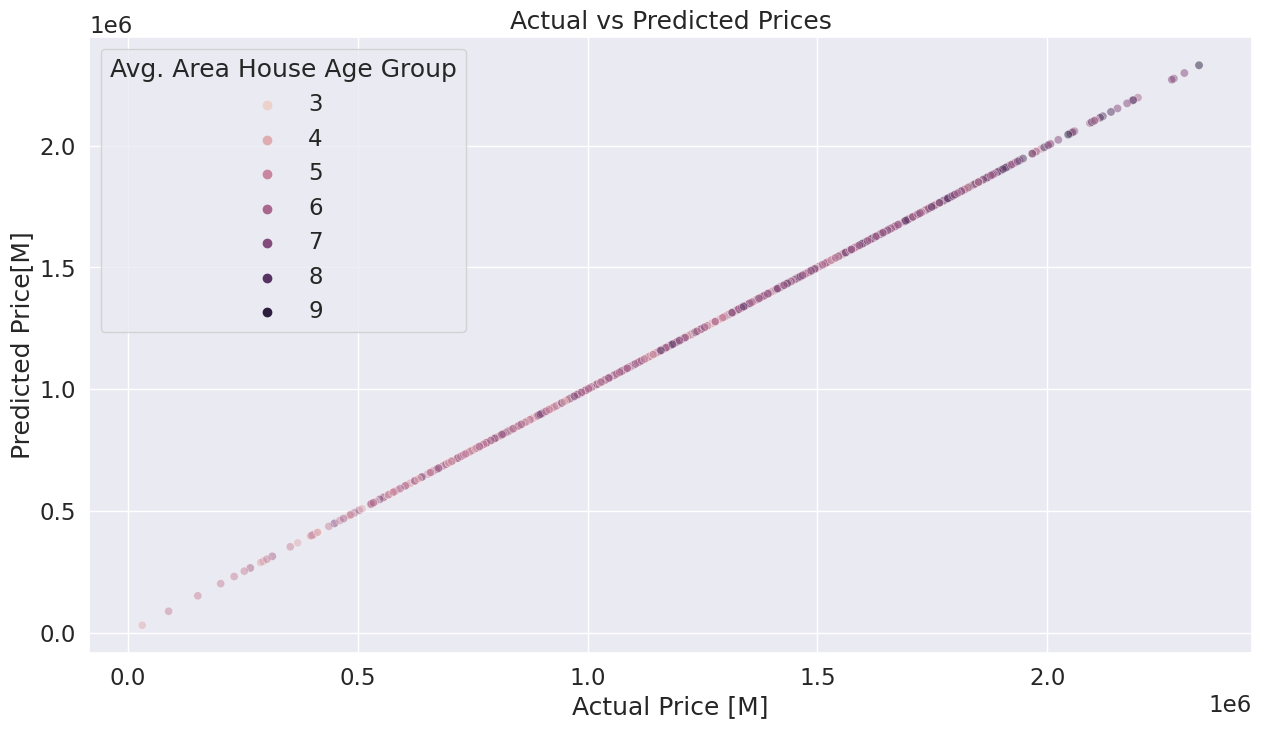

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(y=y_test, x=y_pred_test, hue=X_test['Avg. Area House Age Group'], alpha=0.5)
ax.set_xlabel('Actual Price [M]')
ax.set_ylabel('Predicted Price[M]')
ax.set_title('Actual vs Predicted Prices')
plt.show()


> The model's ability to predict is limited to the dispersion that is situated in proximity to the median and mean, failing to account for the tails of the normal distribution.<br>
> Even with hyperparameter tuning, it would not produce satisfactory results, and we would not attain the levels of accuracy that we will achieve in the following steps.

##  Model 2 - Decision Tree Model



Let's experiment with another algorithm to verify if we can attain improved results.

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Set hyperparameters for the model
t_model = DecisionTreeRegressor(min_samples_leaf=4, # Controls overfitting by limiting the minimum number of samples that can be assigned to a leaf node
                                ccp_alpha=0.01,     # Controls the trade-off between model complexity and accuracy
                                max_leaf_nodes=10,  # Limits the maximum number of leaf nodes in the decision tree
                                max_depth=4)        # Specifies the maximum depth of the decision tree

# Train the model on the training data
t_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, max_leaf_nodes=10,
                      min_samples_leaf=4)

> These hyperparameters can be tuned to optimize model performance.

In [32]:
#The function takes a trained decision tree model and displays it as a plot with the specified size and maximum depth. 
# The resulting plot shows the structure of the decision tree, with each node representing a decision based on a feature value and the branches representing the possible outcomes of the decision.
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(  model,
                max_depth=md,
                feature_names=model.feature_names_in_,
                label='all',
                filled=True,
                rounded=True, 
                fontsize=12);

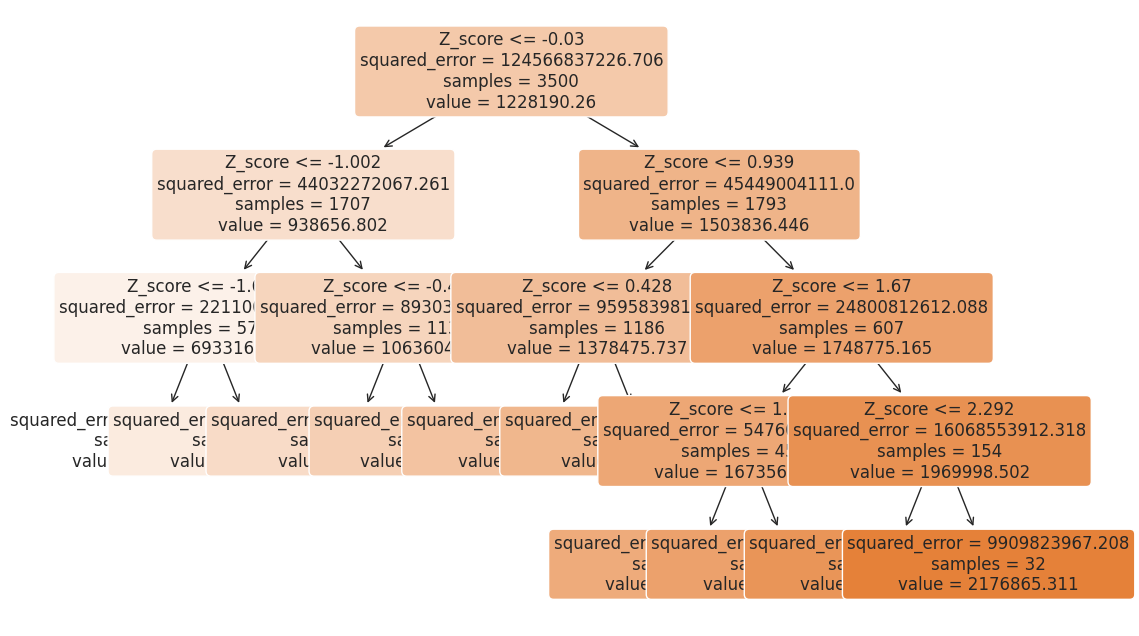

In [33]:
# Generate a plot of the decision tree model t_model, showing the structure of the tree with a maximum depth of 7.
visualize_tree(t_model, md=7)

In [34]:
# Train data
y_pred_train = t_model.predict(X_train)
t_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train, squared=False))

#Test data
t_model.fit(X_test, y_test)
y_pred_test = t_model.predict(X_test)
t_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test, squared=False))

# Calculate the absolute difference between the RMSE of the test and train data
t_model_rmse_test_train_dif = abs(t_rmse_test-t_rmse_train)

print(f"RMSE(train): {t_rmse_train:.3f}")
print(f"RMSE(test): {t_rmse_test:.3f}")
print(f"The RMSE diffrences between the train and test is: {t_model_rmse_test_train_dif:.3f}")

RMSE(train): 238.526
RMSE(test): 238.976
The RMSE diffrences between the train and test is: 0.450


> The score is much better

Let's examine the feature importances

In [35]:
for feature, importance in zip(X_train.columns, t_model.feature_importances_):
    print(f'{feature:12}: {importance}')

Avg. Area Income: 0.0
Avg. Area House Age: 0.0
Avg. Area Number of Rooms: 0.0
Avg. Area Number of Bedrooms: 0.0
Area Population: 0.0
Z_score     : 1.0
Avg. Area House Age Group: 0.0


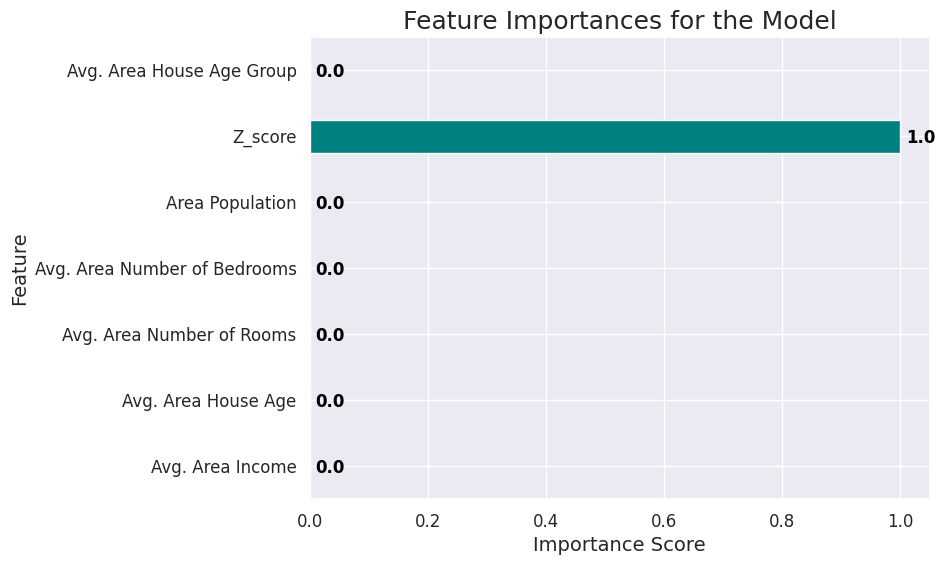

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = pd.Series(t_model.feature_importances_, index=X_train.columns).plot.barh(ax=ax, color='teal')

ax.set_title("Feature Importances for the Model", fontsize=18)

# Increase font size for axis labels and tick labels
ax.set_xlabel("Importance Score", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Add annotations to each bar
for i, v in enumerate(t_model.feature_importances_):
    ax.text(v + 0.01, i - 0.1, str(round(v, 3)), color='black', fontweight='bold', fontsize=12)

plt.show()


> The distribution of feature importances aligns with what we observed during EDA. <br>
> Attempting to train the model using only the Avg. Area Income led to overfitting.

### Conclusion: The decision tree regressor yields an RMSE of 478.758, indicating an improvement of 99.6% over the previous model.

##  Model 3 - K-Nearest Neighbors 


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [38]:
# initiate the pipeline
knn_pipe = Pipeline([('knn', KNeighborsRegressor())])

# choose parameters range 
params = [{'knn__n_neighbors': range(1,10)}]


knn_model = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error', # set evaluation metric to negative mean squared error
                      cv=5)

# fit the GridSearchCV object to the training data
knn_model.fit(X_train, y_train)

# print the best hyperparameters found by GridSearchCV
knn_model.best_params_


{'knn__n_neighbors': 9}

> GridSearchCV is a useful tool for finding the optimal hyperparameters for a model, as it automates the tedious process of manually tuning hyperparameters and evaluating the model's performance for each combination of hyperparameters.<br><br>
> **It's important to note that selecting more than 8 neighbors can lead to overfitting the model.**

In [39]:
# Train data
y_pred_train = knn_model.predict(X_train)
knn_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train, squared=False))

#Test data
knn_model.fit(X_test, y_test)
y_pred_test = knn_model.predict(X_test)
knn_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test, squared=False))

# Calculate the absolute difference between the RMSE of the test and train data
knn_model_rmse_test_train_dif = abs(knn_rmse_test-knn_rmse_train)

print(f"RMSE(train): {knn_rmse_train:.3f}")
print(f"RMSE(test): {knn_rmse_test:.3f}")
print(f"The RMSE diffrences between the train and test is: {knn_model_rmse_test_train_dif:.3f}")

RMSE(train): 462.723
RMSE(test): 464.906
The RMSE diffrences between the train and test is: 2.182


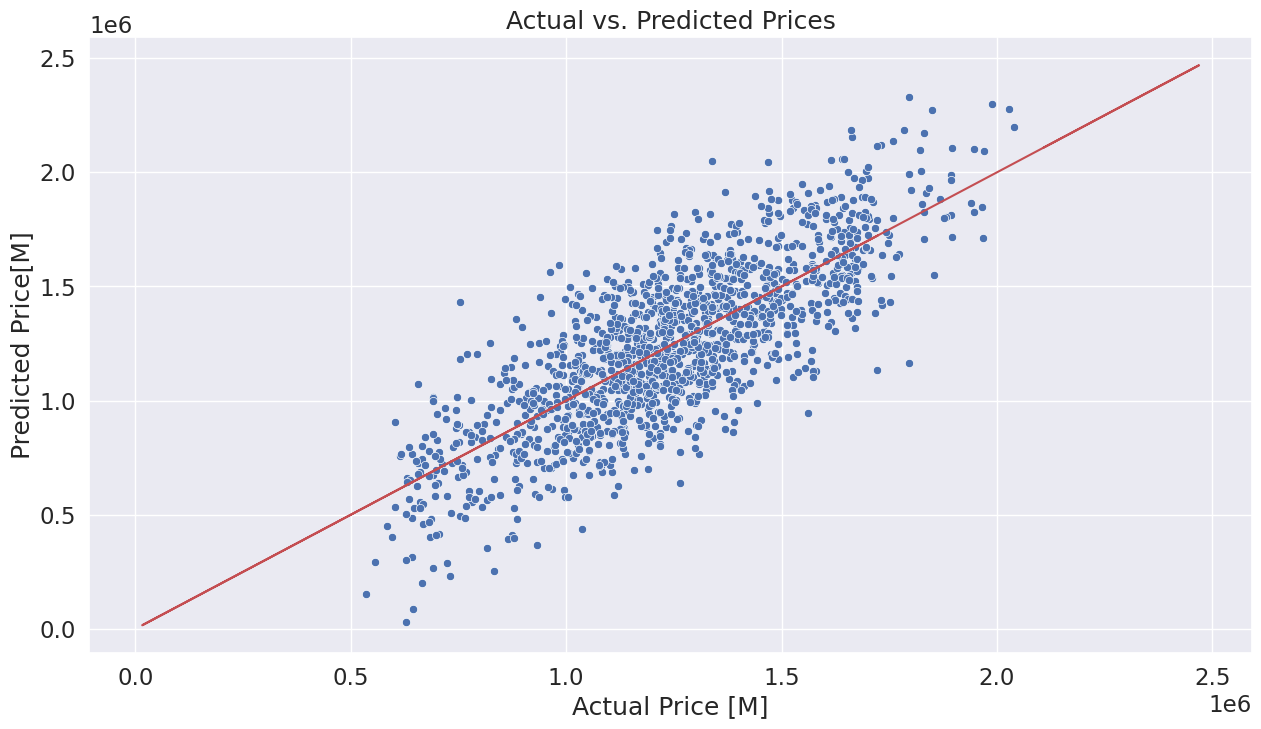

In [40]:
# Visualization of the actual vs predicted prices of the model
ax = sns.scatterplot(x=y_pred_test, y=y_test)
ax.set_xlabel('Actual Price [M]')
ax.set_ylabel('Predicted Price[M]')
ax.set_title('Actual vs. Predicted Prices')
ax.plot(y_train, y_train, 'r')

> The distribution depicted appears to be similar to the actual data, as evidenced by the minority of points at the edges.

# CONCLUSION

After analyzing the data of house prices in the USA, we found that the linear regression algorithm was not accurate enough, with an RMSE of almost 10% of the price. <br>
After implementing the decision tree algorithm, we observed a significant improvement of over 95% in the results. However, to further refine our model, we also experimented with the KNN algorithm. Although the KNN algorithm yielded results similar to the decision tree algorithm, they were not as good. <br>
Ultimately, this analysis allowed us to develop a more accurate model for predicting house prices in the USA.